In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/face-recognition-dataset/Dataset.csv
/kaggle/input/face-recognition-dataset/Faces/Faces/Courtney Cox_24.jpg
/kaggle/input/face-recognition-dataset/Faces/Faces/Henry Cavill_9.jpg
/kaggle/input/face-recognition-dataset/Faces/Faces/Charlize Theron_68.jpg
/kaggle/input/face-recognition-dataset/Faces/Faces/Courtney Cox_55.jpg
/kaggle/input/face-recognition-dataset/Faces/Faces/Billie Eilish_88.jpg
/kaggle/input/face-recognition-dataset/Faces/Faces/Robert Downey Jr_88.jpg
/kaggle/input/face-recognition-dataset/Faces/Faces/Lisa Kudrow_30.jpg
/kaggle/input/face-recognition-dataset/Faces/Faces/Priyanka Chopra_47.jpg
/kaggle/input/face-recognition-dataset/Faces/Faces/Alexandra Daddario_5.jpg
/kaggle/input/face-recognition-dataset/Faces/Faces/Hrithik Roshan_50.jpg
/kaggle/input/face-recognition-dataset/Faces/Faces/Claire Holt_29.jpg
/kaggle/input/face-recognition-dataset/Faces/Faces/Andy Samberg_13.jpg
/kaggle/input/face-recognition-dataset/Faces/Faces/Elizabeth Olsen_64.jpg
/kaggle/

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [5]:
train_dir = "../input/face-recognition-dataset/Original Images/Original Images/"


In [11]:
# Using ImageDataGenerator for data augmentation
generator = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
   validation_split=0.1 
)

In [12]:
# Load and split the data into training and validation sets
train_ds = generator.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    subset="training"  # This is for training data
)

Found 2318 images belonging to 31 classes.


In [14]:
val_ds = generator.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    subset="validation"  # This is for validation data
)

Found 244 images belonging to 31 classes.


In [15]:
# Get the list of classes
classes = list(train_ds.class_indices.keys())

In [17]:
# Build the model
model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(128,128,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
#model.add(Dropout(0.3))
model.add(Dense(len(classes),activation='softmax'))

In [18]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=["accuracy"]
)

In [19]:
# Display the model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 63, 63, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 30, 30, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 6, 6, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 4, 4, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 2, 2, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │        32,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 31)             │         1,023 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 461,343 (1.76 MB)

 Trainable params: 460,255 (1.76 MB)

 Non-trainable params: 1,088 (4.25 KB)

In [20]:
# Train the model using the training set and validate on the validation set
history = model.fit(train_ds, epochs=30, validation_data=val_ds, batch_size=32)

Epoch 1/30


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


73/73 ━━━━━━━━━━━━━━━━━━━━ 102s 1s/step - accuracy: 0.0558 - loss: 3.6765 - val_accuracy: 0.0615 - val_loss: 3.4451
Epoch 2/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 74s 942ms/step - accuracy: 0.0902 - loss: 3.2257 - val_accuracy: 0.0328 - val_loss: 3.7502
Epoch 3/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 73s 921ms/step - accuracy: 0.1680 - loss: 2.9811 - val_accuracy: 0.0369 - val_loss: 4.1158
Epoch 4/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 73s 939ms/step - accuracy: 0.2257 - loss: 2.7033 - val_accuracy: 0.0697 - val_loss: 3.5920
Epoch 5/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 73s 938ms/step - accuracy: 0.2750 - loss: 2.4812 - val_accuracy: 0.0820 - val_loss: 3.8622
Epoch 6/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 73s 934ms/step - accuracy: 0.7035 - loss: 0.9238 - val_accuracy: 0.3607 - val_loss: 2.2956
Epoch 17/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 73s 935ms/step - accuracy: 0.7191 - loss: 0.8846 - val_accuracy: 0.3770 - val_loss: 2.3852
Epoch 18/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 73s 930ms/step - accuracy: 0.7384 - loss: 0.7946 - val_accuracy: 0.409

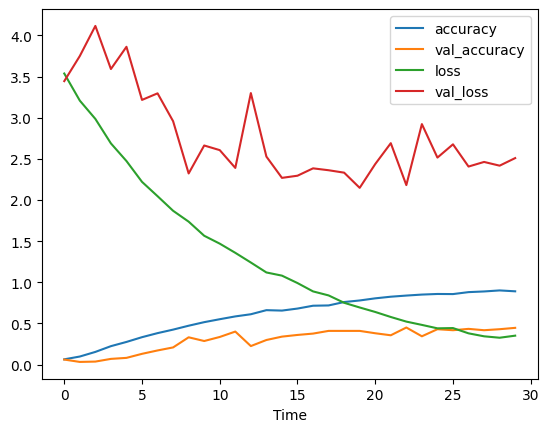

In [21]:
# Plot the training and validation accuracy and loss
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Time')
plt.legend(['accuracy', 'val_accuracy', 'loss', 'val_loss'])
plt.show()

In [22]:
train_loss, train_accuracy = model.evaluate(train_ds)
print(f"Training Accuracy: {train_accuracy*100: .2f}")

73/73 ━━━━━━━━━━━━━━━━━━━━ 52s 708ms/step - accuracy: 0.9099 - loss: 0.2697
Training Accuracy:  91.33


In [23]:
validation_loss, validation_accuracy = model.evaluate(val_ds)
print(f"Validation Accuracy: {train_accuracy*100: .2f}")

8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 774ms/step - accuracy: 0.4225 - loss: 2.4794
Validation Accuracy:  91.33


In [24]:
# Evaluate the model on the test set
test_ds = generator.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    subset="validation"  # Use a portion of the data for testing
)

Found 244 images belonging to 31 classes.


In [25]:
# Get accuracy on the test set
test_loss, test_accuracy = model.evaluate(test_ds)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 744ms/step - accuracy: 0.4590 - loss: 2.5644
Test Accuracy: 43.44%
